In [1]:
!python -m pip install scipy
!python -m pip install matplotlib
!python -m pip install sortedcontainers

You should consider upgrading via the '/home/grosedj/python-envs/mad/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/grosedj/python-envs/mad/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/grosedj/python-envs/mad/env/bin/python -m pip install --upgrade pip' command.


In [55]:
from random import random
from random import seed
from scipy.stats import median_abs_deviation
from sortedcontainers import SortedList
from bisect import bisect_right as br
from math import floor,ceil,sqrt
from statistics import median,mean,variance
import time
import matplotlib.pyplot as plt
from collections import deque



In [2]:

def mad(T) :
    if len(T) == 1 :
        return 0
    mu = (T[ceil(len(T)/2) - 1] + T[floor(len(T)/2)])/2
    a = 0
    b = floor(len(T)/2) - 1
    c = ceil(len(T)/2)
    d = len(T) - 1  
   
    def bisect(T,Ix,Iy,mu) :
        a,b = Ix
        c,d = Iy
        if b - a < 2 :
            if len(T) % 2 == 0 :
                return (max(mu-T[b],T[c]-mu) + min(mu-T[a],T[d]-mu))/2
            else :
                return min(max(mu-T[b],T[c]-mu),min(mu-T[a],T[d]-mu))
        (a,b) = (a + floor((b-a)/2), a + ceil((b-a)/2)) 
        (c,d) = (c + floor((d-c)/2), c + ceil((d-c)/2))
        if 4*mu > T[a] + T[b] + T[c] + T[d] :
            Ix = (a,Ix[1])
            Iy = (c,Iy[1])
        else :
            Ix = (Ix[0],b)
            Iy = (Iy[0],d)
        return bisect(T,Ix,Iy,mu)
    return bisect(T,(a,b),(c,d),mu)

diff = []
for i in range(200) :
    T = SortedList([random() for j in range(5001)])
    diff.append(mad(T)- median_abs_deviation(T))

diff = [d for d in diff if d != 0]

print(diff)










[]


In [73]:
def window(methods,wsize) :
    S = {"methods" : methods,
        "wsize" : wsize,
        "OST" : SortedList([]),
        "D" : deque([],maxlen=wsize+1),
        "Sx" : 0.0,
        "Sxx" : 0.0}
    for method in methods :
        S[method] = method
    return S

def winmad(S) :
    return mad(S["OST"])

def winmax(S) : 
    return S["OST"][(len(S["OST"])-1)]

def winmin(S) : 
    return S["OST"][0]

def winmean(S) :
    if len(S["D"]) == 1 :
        return S["D"][0]
    if len(S["D"]) <= S["wsize"] :
        return (S[winmean]*(len(S["D"])-1) + S["D"][len(S["D"])-1])/len(S["D"]) 
    return(S[winmean]*S["wsize"] + S["D"][len(S["D"])-1] - S["D"][0])/S["wsize"]

def winmedian(S) :
    return (S["OST"][ceil(len(S["OST"])/2) - 1] + S["OST"][floor(len(S["OST"])/2)])/2

def winvar(S) :
    n = len(S["D"])
    if n == 1 :
        return 0
    v = (n*S["Sxx"] - S["Sx"]*S["Sx"])/n/(n-1)
    if v < 0.0 :
        v = 0.0
    return v


def update(S,x) :
    S["D"].append(x)
    S["OST"].add(x)
    S["Sx"] = S["Sx"] + x
    S["Sxx"] = S["Sxx"] + x*x
    if len(S["D"]) == S["wsize"]+1 :
        S["OST"].remove(S["D"][0])
        S["Sx"] = S["Sx"] - S["D"][0]
        S["Sxx"] = S["Sxx"] - S["D"][0]*S["D"][0]
    for method in S["methods"] :
        S[method] = method(S)
    return S

# w = window([winmad,winmax,winmin,winmean,winmedian,winvar],2000)
n = 16000
k = 50000
w = window([winmad],n)

 
seed(0)
x = [random() for i in range(n+k)]
start_time = time.perf_counter()
for r in x :
    w = update(w,r)
end_time = time.perf_counter()
print(end_time-start_time)
#print(w[winmedian],w[winmad],w[winmean],w[winvar],w[winmax],w[winmax],w[winmin])
#x = x[-2000:]
#print(median(x),median_abs_deviation(x),mean(x),variance(x),max(x),min(x))


15.035826153995004


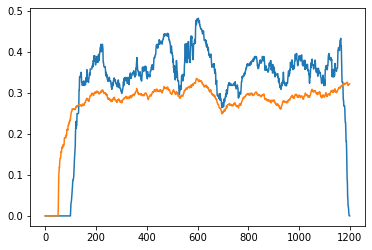

In [77]:
def padzero(X,wsize) :
    X = floor(wsize/2)*[0] + X + floor(wsize/2)*[0]
    return X

def padvalue(X,wsize) :
    X = floor(wsize/2)*[X[0]] + X + floor(wsize/2)*[X[-1]]
    return X

def winstats(X,methods,wsize,padding = None) :
    if padding != None :
        X = padding(X,wsize)
    w = window(methods,wsize)
    R = {}
    for method in methods :
        R[method] = []
    for x in X :
        w = update(w,x)
        for method in methods :
            R[method].append(w[method])
    return R
    

    
seed(0)
n = 1000
k = 100
X = [random() for i in range(n+k)]
R = winstats(X,[winvar,winmad],k,padvalue)
plt.plot(range(0,len(R[winmad])),[m*1.4826 for m in R[winmad]])
plt.plot(range(0,len(R[winvar])),[sqrt(var) for var in R[winvar]])

[0.0, 0.6931471805599453, 1.3862943611198906, 2.0794415416798357, 2.772588722239781, 3.4657359027997265, 4.1588830833596715, 4.852030263919617, 5.545177444479562, 6.238324625039508, 6.931471805599453, 7.6246189861593985, 8.317766166719343, 9.010913347279288, 9.704060527839234]


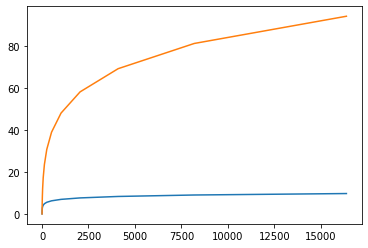

In [156]:
from math import log
X=[2**i for i in range(0,15)]
Y  = [log(x) for x in X]
Z = [log(x)*log(x) for x in X]
print(Y)
plt.plot(X,Y)
plt.plot(X,Z)

In [38]:
D = dict()
D["L"] = []
D["L"].append(1)
D["L"]

[1]

${\rm mad} = {\rm bisect}(T,\mu_{T},a,b,c,d)$

$\mu_{T} = (T_{\left \lceil{\# T /2 }\right \rceil - 1} + T_{\left \lfloor{\# T /2 }\right \rfloor})/2$

$a = 0$

$b = \left \lfloor{\# T /2 }\right \rfloor - 1 $

$c = \left \lceil{\# T /2 }\right \rceil$

$d = \#T - 1 $

